# ¡Hola Hans! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

----

<div class="alert alert-block alert-success">
<b>Comentario Revisión del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Hans excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. Estoy seguro de que lo que aprendiste aquí te será muy útil más adelante. 

¡Éxito en tu próximo sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-----

# 
¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [73]:
orders.columns = orders.columns.str.strip().str.lower().str.replace(' ', '_')
orders['order_id'] = orders['order_id'].astype('int')
orders['user_id'] = orders['user_id'].astype('int')
#orders['days_since_prior_order'].fillna(0, inplace=True)
print(orders.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  


In [74]:
products.columns = products.columns.str.strip().str.lower().str.replace(' ', '_')
products['product_id'] = products['product_id'].astype('int')
products['aisle_id'] = products['aisle_id'].astype('int')
products['department_id'] = products['department_id'].astype('int')
#products['product_name'].fillna('Unknown', inplace=True)
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [75]:
aisles.columns = aisles.columns.str.strip().str.lower().str.replace(' ', '_')
print(aisles.describe())

         aisle_id
count  134.000000
mean    67.500000
std     38.826537
min      1.000000
25%     34.250000
50%     67.500000
75%    100.750000
max    134.000000


In [76]:
departments.columns = departments.columns.str.strip().str.lower().str.replace(' ', '_')
print(departments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [77]:
order_products.columns = order_products.columns.str.strip().str.lower().str.replace(' ', '_')
order_products['order_id'] = order_products['order_id'].astype('int')
order_products['product_id'] = order_products['product_id'].astype('int')
print(order_products.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
Es importante validar la informacion que se nos da para conocer a grandes razgos la informacion y utilizar el metodo info nos da un panorama del tama;o de los datos 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy bien Hans, has realizado una limpieza de columnas muy cuidadosa en todos los DataFrames, asegurando consistencia en nombres y tipos de datos clave. También hiciste una correcta validación del contenido de las tablas usando `.info()` y `.describe()`

</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
despues de haber visto los datos el siguiente paso es limparlos, de tal forma que podamos verlos sin duplicados o NaN

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

In [78]:
duplicated_order_ids = orders[orders.duplicated(subset=['order_id'], keep=False)]


print(f"Número de registros duplicados por order_id: {len(duplicated_order_ids)}")
duplicated_order_ids.sort_values('order_id')

Número de registros duplicados por order_id: 30


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10.0
371905,391768,57671,19,3,2,10.0
119251,408114,68324,4,3,2,18.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
250626,467134,63189,21,3,2,2.0
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
242618,1021560,53767,3,3,2,9.0


### `orders` data frame

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? si tengo 15 datos duplicados en orders a la  misma hora el mismo dia 

In [79]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wed_2am_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
print(f"Número total de pedidos los miércoles a las 2:00 a.m.: {len(wed_2am_orders)}")

print(wed_2am_orders[['order_id', 'user_id', 'order_dow', 'order_hour_of_day','days_since_prior_order']].head(121))

Número total de pedidos los miércoles a las 2:00 a.m.: 121
        order_id  user_id  order_dow  order_hour_of_day  \
4838     2766110   162084          3                  2   
5156     2190225   138285          3                  2   
15506     553049    58599          3                  2   
18420     382357   120200          3                  2   
24691     690242    77357          3                  2   
...          ...      ...        ...                ...   
457013   3384021    14881          3                  2   
458816    910166   164782          3                  2   
459635   1680532   106435          3                  2   
468324    222962    54979          3                  2   
477526   2592344    46860          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                      7.0  
18420                     11.0  
24691                      9.0  
...                        ...  
4

¿Qué sugiere este resultado? con esta informacion no puedo tomar una decision 

In [80]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates(subset=['order_id'])

In [81]:
# Vuelve a verificar si hay filas duplicadas
orders_duplicates = orders[orders.duplicated(keep=False)]
print(f"Filas completamente duplicadas en orders: {len(orders_duplicates)}")


Filas completamente duplicadas en orders: 0


In [82]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
duplicate_order_ids = orders['order_id'].duplicated().sum()
print(duplicate_order_ids)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos 
aun despues de hacer limpieza de los datos seguian los datos duplicados tuve que hacer limpieza de la sub lista para poder borrarlos completamente 

### `products` data frame

In [83]:
# Verifica si hay filas totalmente duplicadas
total_duplicates = products.duplicated().sum()
print(f"Número de filas completamente duplicadas: {total_duplicates}")

Número de filas completamente duplicadas: 0


In [84]:
# Revisa únicamente si hay ID de productos duplicados
duplicate_ids = products['product_id'].duplicated().sum()
print(f"Número de ID  duplicadas: {duplicate_ids}")

Número de ID  duplicadas: 0


In [85]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['nombre_normalizado'] = (
    products['product_name']
    .str.upper() 
    .str.strip() 
    .str.replace(r'\s+', ' ', regex=True)  
)
duplicados = products[products.duplicated(subset=['nombre_normalizado'], keep=False)]
num_duplicados = len(duplicados)
nombres_distintos_duplicados = duplicados['nombre_normalizado'].nunique()
print(f"Análisis de nombres duplicados (insensible a mayúsculas):")
print(f"Registros con nombres duplicados: {num_duplicados}")
print(f"Nombres distintos que se repiten: {nombres_distintos_duplicados}")


Análisis de nombres duplicados (insensible a mayúsculas):
Registros con nombres duplicados: 1538
Nombres distintos que se repiten: 139


In [86]:
# Revisa si hay nombres duplicados de productos no faltantes
print(duplicados['nombre_normalizado'].value_counts().head(5))


GREEN TEA WITH GINSENG AND HONEY                        4
FLAT FILLETS OF ANCHOVIES IN PURE OLIVE OIL             2
NATURAL CALIFORNIA RAISINS                              2
FREE & CLEAR UNSCENTED REFILL VALUE PACKS BABY WIPES    2
HALF AND HALF                                           2
Name: nombre_normalizado, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Hay pocos productos que se repiten pero el agrupamiento de UNKNOWN dispara un descontrol de informacion por no saber a que producto se refiere. 

### `departments` data frame

In [87]:
# Revisa si hay filas totalmente duplicadas
duplicados = departments[departments.duplicated(keep=False)] 
total_duplicados = departments.duplicated().sum()

print(f"Total de filas duplicadas: {total_duplicados}")

Total de filas duplicadas: 0


In [88]:
# Revisa únicamente si hay IDs duplicadas de departamentos
ids_duplicados = departments["department_id"].duplicated(keep=False)
total_ids_duplicados = departments["department_id"].duplicated().sum()

print(f"Total de department_id duplicados: {total_ids_duplicados}")

Total de department_id duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos. pues siguiendo las indicaciones no encontre filas ni id's duplicados 

### `aisles` data frame

In [89]:
# Revisa si hay filas totalmente duplicadas
filas_duplicadas = aisles.duplicated(keep=False)
total_duplicados = filas_duplicadas.sum()
print(f"Total de filas totalmente duplicadas: {total_duplicados}")

Total de filas totalmente duplicadas: 0


In [90]:
# Revisa únicamente si hay IDs duplicadas de pasillos
ids_duplicados = aisles["aisle_id"].duplicated(keep=False)
total_duplicados = ids_duplicados.sum()

print(f"Total de 'aisle_id' duplicados: {total_duplicados}")

Total de 'aisle_id' duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos. 
no encontre datos duplicados 

### `order_products` data frame

In [91]:
# Revisa si hay filas totalmente duplicadas
total_duplicates = order_products.duplicated().sum()

print(f"Total de filas totalmente duplicadas: {total_duplicates}")

Total de filas totalmente duplicadas: 0


In [92]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
dup_combinaciones = order_products.groupby(['order_id', 'product_id']).size().reset_index(name='counts')
conflictos = dup_combinaciones[dup_combinaciones['counts'] > 1]
print(dup_combinaciones)

         order_id  product_id  counts
0               4       10054       1
1               4       17616       1
2               4       21351       1
3               4       22598       1
4               4       25146       1
...           ...         ...     ...
4545002   3421077       26940       1
4545003   3421077       27845       1
4545004   3421077       27966       1
4545005   3421077       45007       1
4545006   3421079       30136       1

[4545007 rows x 3 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos. no encontre datos duplicados y luego busque conbinaciones duplicadas, pero no encontre datos 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo al identificar y eliminar los datos duplicados. Esto ayuda a evitar sesgos, mejora la calidad del análisis y hace que los modelos sean más precisos. Además, trabajar con datos limpios facilita la interpretación y el uso eficiente de los recursos. 

</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [93]:
# Encuentra los valores ausentes en la columna 'product_name'
missing_values = products['product_name'].isna()
total_missing = missing_values.sum()

print(f"Total de valores ausentes en 'product_name': {total_missing}")

if total_missing > 0:
    print("\nMuestra de registros con product_name ausente:")
    print(products[missing_values].head(100))
else:
    print("\nNo se encontraron valores ausentes en 'product_name'")


Total de valores ausentes en 'product_name': 1258

Muestra de registros con product_name ausente:
      product_id product_name  aisle_id  department_id nombre_normalizado
37            38          NaN       100             21                NaN
71            72          NaN       100             21                NaN
109          110          NaN       100             21                NaN
296          297          NaN       100             21                NaN
416          417          NaN       100             21                NaN
...          ...          ...       ...            ...                ...
4402        4403          NaN       100             21                NaN
4419        4420          NaN       100             21                NaN
4425        4426          NaN       100             21                NaN
4440        4441          NaN       100             21                NaN
4483        4484          NaN       100             21                NaN

[100 rows x 5

Describe brevemente cuáles son tus hallazgos. tengo 1258 registros sin nombre de los cuales pareciera tener en comun el mismo aisle ID y deparment ID 

In [94]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 10
if total_missing > 0:
    print(products[missing_values]['aisle_id'].value_counts().head())

100    1258
Name: aisle_id, dtype: int64


Describe brevemente cuáles son tus hallazgos. se confirma que los 1258 valores ausentes pertenecen a al aisle_id 100

In [95]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
if total_missing > 0:
    print(products[missing_values]['department_id'].value_counts().head())

21    1258
Name: department_id, dtype: int64


Describe brevemente cuáles son tus hallazgos.se confirma que los 1258 valores ausentes pertenecen a al department_id 21

In [96]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100 = aisles[aisles['aisle_id'] == 100]

if not aisle_100.empty:
    print("Información del Pasillo ID 100:")
    print(aisle_100)
dept_21 = departments[departments['department_id'] == 21]

if not dept_21.empty:
    print("Información del Departamento ID 21:")
    print(dept_21)

Información del Pasillo ID 100:
    aisle_id    aisle
99       100  missing
Información del Departamento ID 21:
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos. tanto el pasillo 100 y el departamento 21 estan descritos como faltantes 

In [97]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
missing_product_names = products['product_name'].isna()
total_missing = missing_product_names.sum()

print(f"Total de valores ausentes en 'product_name': {total_missing}")

Total de valores ausentes en 'product_name': 0


Describe brevemente tus hallazgos y lo que hiciste con ellos. a este punto le pedimos a python buscar los registros con valores ausentes y rellenarlos con Unknown

### `orders` data frame

In [98]:
# Encuentra los valores ausentes
missing_values = orders.isnull().sum()
print("Valores ausentes por columna:")
print(missing_values)


Valores ausentes por columna:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [99]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
nan_values = orders[orders['days_since_prior_order'].isna()]

print(nan_values[['order_id', 'user_id', 'order_number', 'days_since_prior_order']].head(100))
total_nan = orders['days_since_prior_order'].isna().sum()
first_orders_nan = nan_values[nan_values['order_number'] == 1]
print(f"De ellos, {len(first_orders_nan)} son primeros pedidos (order_number = 1)")


      order_id  user_id  order_number  days_since_prior_order
28      133707   182261             1                     NaN
96      787445    25685             1                     NaN
100     294410   111449             1                     NaN
103    2869915   123958             1                     NaN
104    2521921    42286             1                     NaN
...        ...      ...           ...                     ...
1677   1592922    83439             1                     NaN
1685     91899   117893             1                     NaN
1718   2635902    87892             1                     NaN
1750   3298976   144090             1                     NaN
1759    320229   165818             1                     NaN

[100 rows x 4 columns]
De ellos, 28817 son primeros pedidos (order_number = 1)


Describe brevemente tus hallazgos y lo que hiciste con ellos.busque los datos NaN y dado que es la primera orden del cliente tiene sentido que no hayan dias desde su ultima orden  

### `order_products` data frame

In [100]:
# Encuentra los valores ausentes
missing_values = order_products.isnull().sum()
print("Valores ausentes por columna:")
print(pd.DataFrame({
    'Valores Ausentes': missing_values, }))
print(order_products[order_products['add_to_cart_order'].isna()].head(10))

Valores ausentes por columna:
                   Valores Ausentes
order_id                          0
product_id                        0
add_to_cart_order               836
reordered                         0
       order_id  product_id  add_to_cart_order  reordered
737     2449164        5068                NaN          0
9926    1968313       43867                NaN          0
14394   2926893       11688                NaN          0
16418   1717990        4142                NaN          0
30114   1959075       42828                NaN          1
34183    844733       32717                NaN          0
57981     61355        5322                NaN          0
58228    936852       31373                NaN          1
62655    264710       40281                NaN          0
64336   1717990       39408                NaN          0


In [101]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
stats = order_products['add_to_cart_order'].describe()
print(f"• Mínimo: {stats['min']}")
print(f"• Máximo: {stats['max']}")

• Mínimo: 1.0
• Máximo: 64.0


Describe brevemente cuáles son tus hallazgos.no hay informacion suficiente para explicar los valores ausentes 

In [102]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_cart_orders = order_products[order_products['add_to_cart_order'].isna()]

order_ids_with_missing_values = missing_cart_orders['order_id'].unique()
print(order_ids_with_missing_values[:10])

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093]


In [103]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
missing_data = order_products[order_products['add_to_cart_order'].isna()]
missing_orders_stats = missing_data.groupby('order_id')['product_id'].count()
total_products_per_order = order_products.groupby('order_id').size()
affected_orders_size = total_products_per_order[missing_orders_stats.index]

print(f"- Pedidos afectados: {len(missing_orders_stats)}")
print(f"- Máximo de productos en pedidos afectados: {affected_orders_size.max()}")
print(f"- Minimo de productos en pedidos afectados: {affected_orders_size.min()}")


- Pedidos afectados: 70
- Máximo de productos en pedidos afectados: 127
- Minimo de productos en pedidos afectados: 65


Describe brevemente cuáles son tus hallazgos.el conteo de los 'add_to_cart_order': el orden secuencial en el que se añadió cada artículo en el carrito. 
deja de contar despues del articulo 64 

In [104]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = (
    order_products['add_to_cart_order']
    .fillna(999)          
    .astype('int64'))
stats = order_products['add_to_cart_order'].describe()
print(f"• Mínimo: {stats['min']}")
print(f"• Máximo: {stats['max']}")

• Mínimo: 1.0
• Máximo: 999.0


Describe brevemente tus hallazgos y lo que hiciste con ellos.cambie los datos NaN con 999 y verifique que el maximo sea 999 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
identifique datos ausentes en las lista y analice el trasfondo de ellos para entender el comportamiento del error en la adquisicion de datos y se cambiaron aquellos que ameritaban un valor sin afectar la media y moda de los mismos 


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo manejando los valores faltantes! Esta etapa es clave para evitar sesgos y errores en los análisis o modelos. Según el caso, se pueden eliminar, imputar o estimar con técnicas avanzadas. Te dejo un artículo muy útil con diferentes formas de tratarlos: [Manejo de datos faltantes](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python)

</div>

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [105]:
hour_check = orders['order_hour_of_day'].between(0, 23).all()
print(f"'order_hour_of_day' entre 0-23: ")

print("\nDistribución de horas:")
print(orders['order_hour_of_day'].value_counts().sort_index())
print(orders['order_hour_of_day'].describe())

'order_hour_of_day' entre 0-23: 

Distribución de horas:
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64
count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64


In [106]:
dow_check = orders['order_dow'].between(0, 6).all()
print(f"'order_dow' entre 0-6:")

dow_map = {0: 'Dom', 1: 'Lun', 2: 'Mar', 3: 'Mié', 4: 'Jue', 5: 'Vie', 6: 'Sáb'}
print("\nDistribución por día:")
print(orders['order_dow'].map(dow_map).value_counts().sort_index())
print("\nEstadísticas de 'days_since_prior_order':")
print(orders['days_since_prior_order'].describe())

q99 = orders['days_since_prior_order'].quantile(0.99)
outliers = orders[orders['days_since_prior_order'] > q99]
print(f"\nValores atípicos (> percentil 99 = {q99} días): {len(outliers)}")

'order_dow' entre 0-6:

Distribución por día:
Dom    84090
Jue    59810
Lun    82185
Mar    65833
Mié    60897
Sáb    62649
Vie    63488
Name: order_dow, dtype: int64

Estadísticas de 'days_since_prior_order':
count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

Valores atípicos (> percentil 99 = 30.0 días): 0


Escribe aquí tus conclusiones con la visualizacion de los datos por hora y dia podemos darnos cuenta de en que horario y que dia hay mas pedidos

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo validando los datos de hora y día de la semana! Estas comprobaciones son clave para asegurar que no haya errores que afecten los análisis. Detectar inconsistencias a tiempo mejora la calidad y confiabilidad de los resultados.

</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

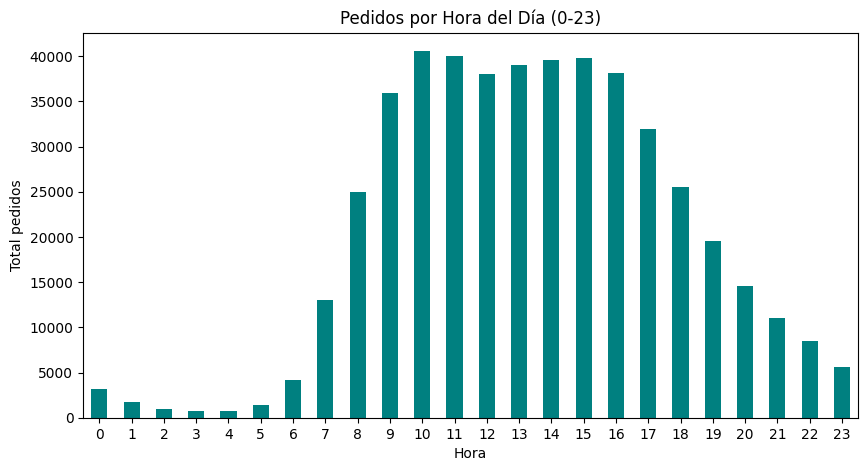

In [107]:
plt.figure(figsize=(10, 5))
orders['order_hour_of_day'].value_counts().sort_index().plot(
    kind='bar', 
    color='teal',
    title='Pedidos por Hora del Día (0-23)'
)
plt.xlabel('Hora')
plt.ylabel('Total pedidos')
plt.xticks(rotation=0)
plt.show()

Escribe aquí tus conclusiones en esta imagen nos queda claro el comportamiento del total de pedidos por hora y con mean         13.447034
std           4.224567
y las horas con menos pedidos son 17-8 hrs 

### [A3] ¿Qué día de la semana compran víveres las personas?

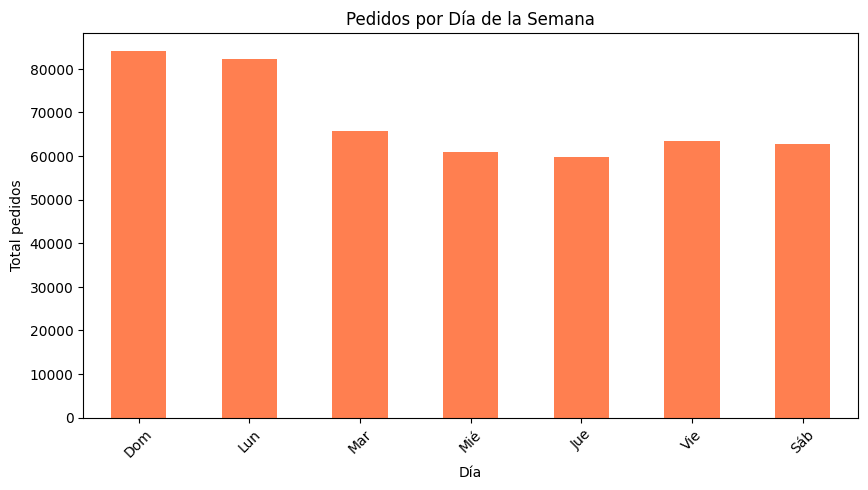

In [108]:
plt.figure(figsize=(10, 5))
orders['order_dow'].map(dow_map).value_counts().loc[list(dow_map.values())].plot(
    kind='bar',
    color='coral',
    title='Pedidos por Día de la Semana'
)
plt.xlabel('Día')
plt.ylabel('Total pedidos')
plt.xticks(rotation=45)
plt.show()

Escribe aquí tus conclusiones En esta otra grafica podemos ver que el dia domingo es el dia que se realizan mas pedidos 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo al mostrar las órdenes por día de la semana con el diagrama de barras. Efectivamente, la mayoría de clientes hacen sus compras al inicio de la semana, esto es un detalle interesante que nos ayuda a entender mejor el comportamiento de los clientes

</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

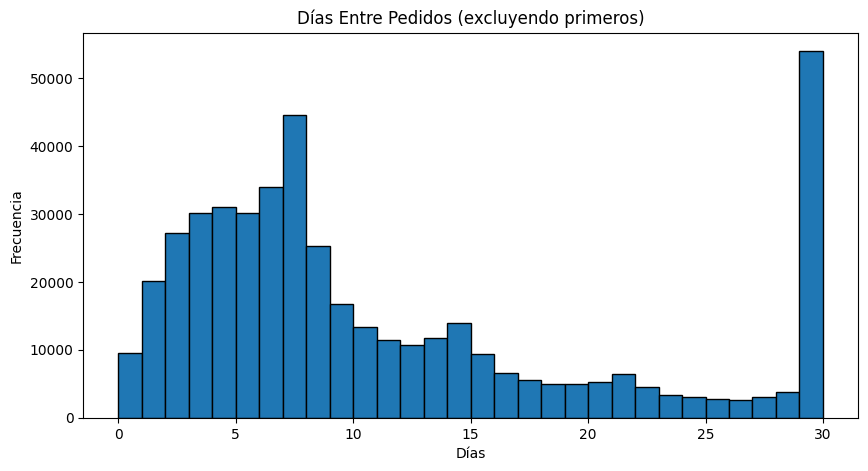

In [109]:
plt.figure(figsize=(10, 5))
orders['days_since_prior_order'].plot(
    kind='hist',
    bins=30,
    edgecolor='black',
    title='Días Entre Pedidos (excluyendo primeros)',
    range=(0, 30)
)
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.show()

Escribe aquí tus conclusiones excluyendo el valor atipico del 30 por los valores modificados, podemos ver que se realizan nuevamente pedidos despues de siete dias 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo obteniendo la gráfica, ésta permite ver patrones como compras semanales o mensuales.

Muchos de los clientes hacen compras semanales (cada 7 días), y parece que una gran proporción de usuarios realiza compras mensuales (cada 30 días). Sin embargo, la tendencia decreciente en los últimos días podría indicar un error común al registrar los datos correspondientes al día 30, ya que, cuando no hay información disponible, algunos sistemas suelen asignar automáticamente el último valor de la serie de tiempo (última hora, último día de la semana, del mes o del año). Es un detalle importante a tener en cuenta para mejorar la precisión de los datos.

</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [110]:
wed_data = orders[orders['order_dow'] == 3]
sat_data = orders[orders['order_dow'] == 6]

plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 24 artists>

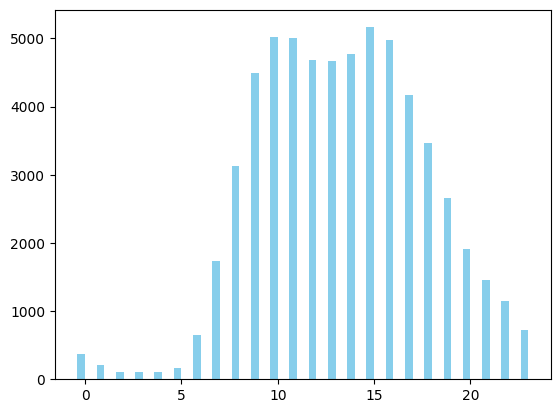

In [111]:
wed_hours = wed_data['order_hour_of_day'].value_counts().sort_index()
plt.bar(
    wed_hours.index - 0.2, 
    wed_hours.values, 
    width=0.4, 
    color='skyblue', 
    label='Miércoles'
)

<BarContainer object of 24 artists>

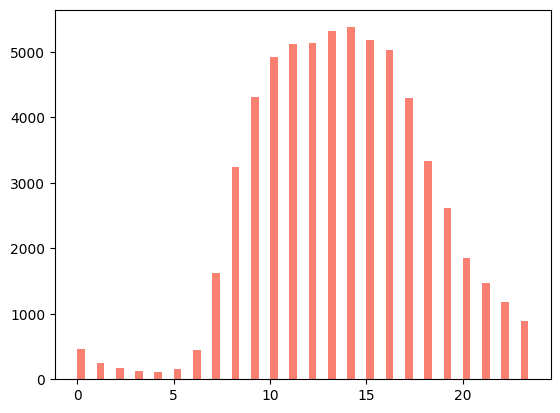

In [112]:
sat_hours = sat_data['order_hour_of_day'].value_counts().sort_index()
plt.bar(
    sat_hours.index + 0.2, 
    sat_hours.values, 
    width=0.4, 
    color='salmon', 
    label='Sábado'  
)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

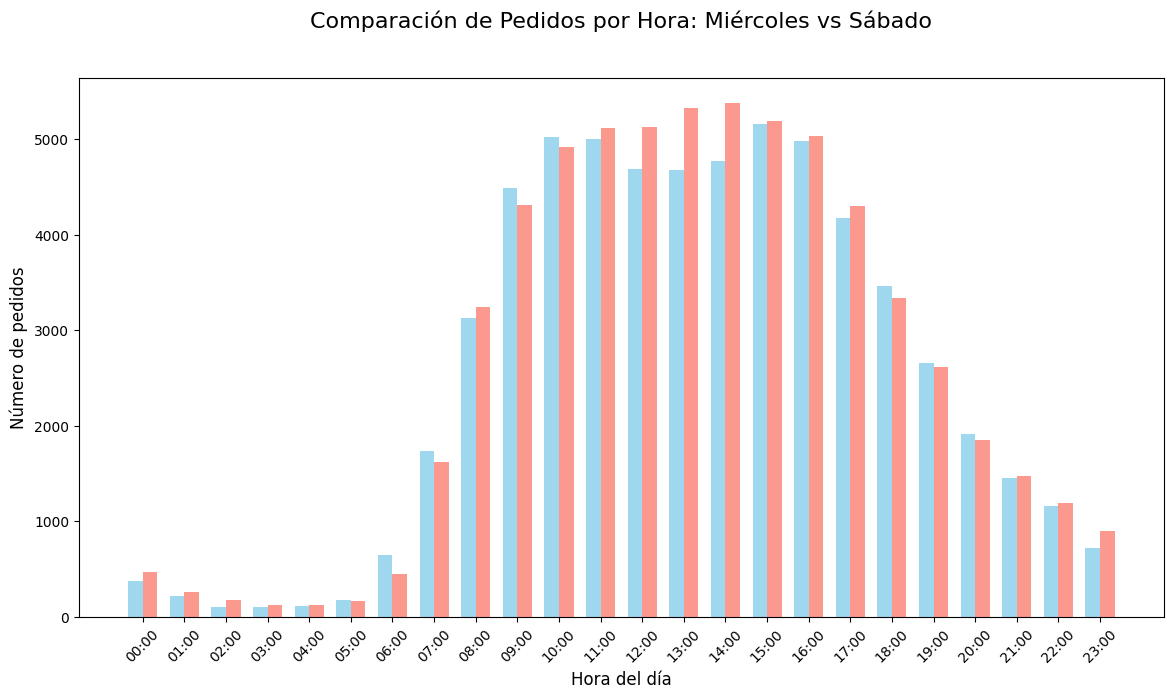

In [113]:
wed_data = orders[orders['order_dow'] == 3]  # Miércoles
sat_data = orders[orders['order_dow'] == 6]  # Sábado

wed_counts = wed_data['order_hour_of_day'].value_counts().sort_index()
sat_counts = sat_data['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
bar_width = 0.35
x_pos = np.arange(24)

plt.bar(x_pos - bar_width/2, wed_counts, width=bar_width, color='skyblue', label='Miércoles', alpha=0.8)
plt.bar(x_pos + bar_width/2, sat_counts, width=bar_width, color='salmon', label='Sábado', alpha=0.8)

plt.title('Comparación de Pedidos por Hora: Miércoles vs Sábado\n', fontsize=16, pad=20)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Número de pedidos', fontsize=12)
plt.xticks(x_pos, [f'{h:02d}:00' for h in range(24)], rotation=45)
plt.yticks(fontsize=10)

Escribe aquí tus conclusiones en esta ultima grafica de los dos dias combinados podemos ver que se comportan perecido pero con mayor numero de pedidos el dia sabado de 12-2  

Yo considero que esas horas son las mas bajas ya que son los horarios en los que los empleados salen a comer. 
Es decir aprovechan a ir a un lugar a comer en lugar de hacer pedidos

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [114]:
orders_per_user = orders.groupby('user_id')['order_id'].nunique()
stats = orders_per_user.describe()
print(stats)

count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: order_id, dtype: float64


 Segmentación de clientes:
1-5      78.693182
6-10     16.720219
11-20     4.518025
21-50     0.068574
51+       0.000000
Name: order_id, dtype: float64


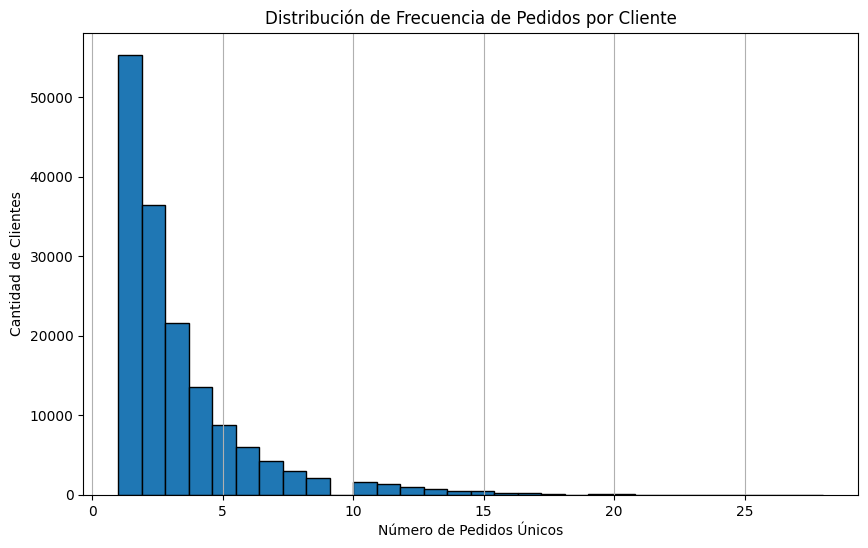

In [115]:
bins = [1, 5, 10, 20, 50, 100]
labels = ['1-5', '6-10', '11-20', '21-50', '51+']
segments = pd.cut(orders_per_user, bins=bins, labels=labels).value_counts(normalize=True) * 100

print(" Segmentación de clientes:")
print(segments.sort_index())
plt.figure(figsize=(10, 6))
orders_per_user.hist(bins=30, edgecolor='black')
plt.title('Distribución de Frecuencia de Pedidos por Cliente')
plt.xlabel('Número de Pedidos Únicos')
plt.ylabel('Cantidad de Clientes')
plt.grid(axis='y', alpha=0.75)
plt.show()

Escribe aquí tus conclusiones Con esta informacion podemos ver que la media de pedidos por cliente es de 3.04 y que el 78% de los clientes piden entre 1 a 5 veces
count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [116]:
top_products = (
    order_products.merge(products, on='product_id')
    .groupby(['product_id', 'product_name'])
    .size()
    .sort_values(ascending=False)
    .head(20)
    .reset_index(name='total_pedidos')
)

print(" Top 20 Productos Más Pedidos:")
print(top_products.to_string(index=False))

 Top 20 Productos Más Pedidos:
 product_id             product_name  total_pedidos
      24852                   Banana          66050
      13176   Bag of Organic Bananas          53297
      21137     Organic Strawberries          37039
      21903     Organic Baby Spinach          33971
      47209     Organic Hass Avocado          29773
      47766          Organic Avocado          24689
      47626              Large Lemon          21495
      16797             Strawberries          20018
      26209                    Limes          19690
      27845       Organic Whole Milk          19600
      27966      Organic Raspberries          19197
      22935     Organic Yellow Onion          15898
      24964           Organic Garlic          15292
      45007         Organic Zucchini          14584
      39275      Organic Blueberries          13879
      49683           Cucumber Kirby          13675
      28204       Organic Fuji Apple          12544
       5876            Organic Le

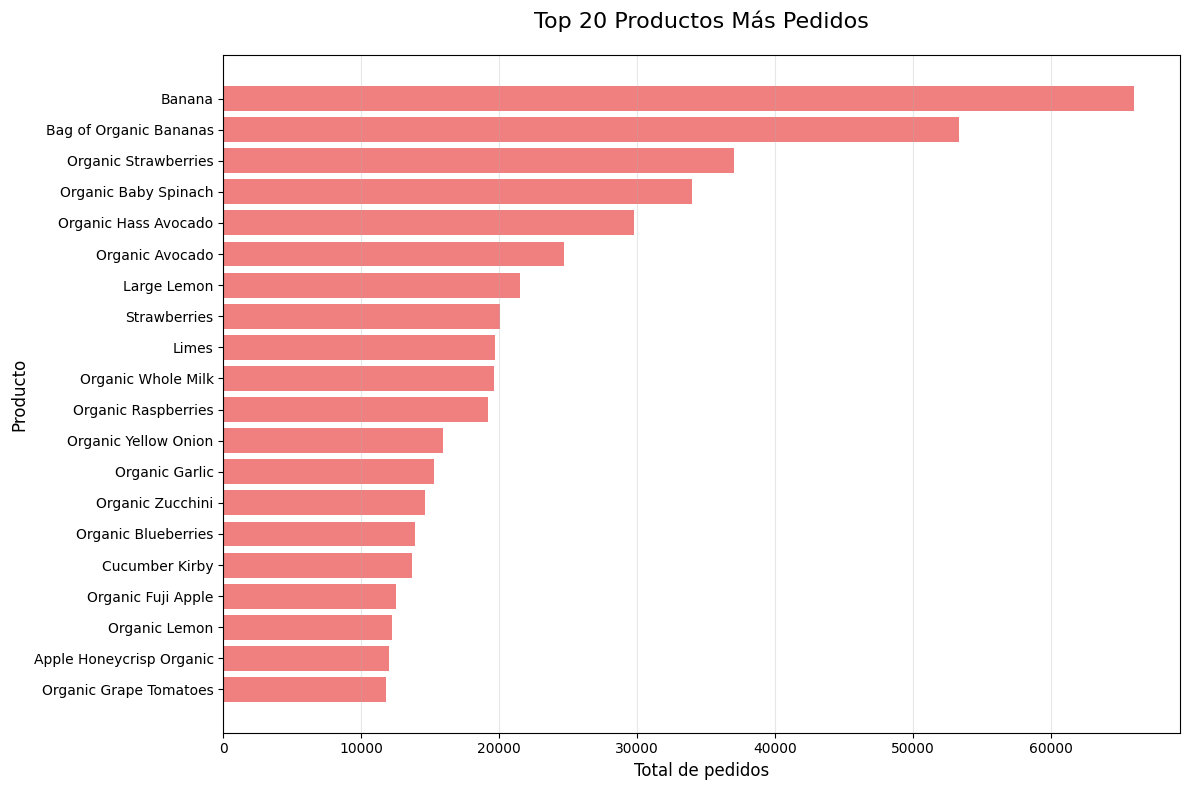

In [117]:
plt.figure(figsize=(12, 8))
plt.barh(
    top_products['product_name'][::-1], 
    top_products['total_pedidos'][::-1],
    color='lightcoral'
)

plt.title('Top 20 Productos Más Pedidos', fontsize=16, pad=20)
plt.xlabel('Total de pedidos', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones En el grafico podemos ver como el articulo mas pedido es platanos y blosa de platanos organicos 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Perfecto! Identificaste muy bien el Top 20 de productos más populares. Frutas como plátanos, fresas y aguacates lideran la lista, y hay una clara preferencia por los productos "Organic". Esto revela tendencias valiosas sobre los gustos y prioridades de los clientes.

</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [118]:
items_per_order = order_products.groupby('order_id')['product_id'].count()

print(" Estadísticas clave:")
print(items_per_order.describe())

 Estadísticas clave:
count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


In [119]:
bins = [1, 5, 10, 20, 50, 150]
labels = ['1-5', '6-10', '11-20', '21-50', '51+']
segments = pd.cut(items_per_order, bins=bins, labels=labels).value_counts(normalize=True).sort_index() * 100

print(" Segmentación de pedidos:")
print(segments)

 Segmentación de pedidos:
1-5      27.630845
6-10     32.706522
11-20    29.702545
21-50     9.859902
51+       0.100187
Name: product_id, dtype: float64


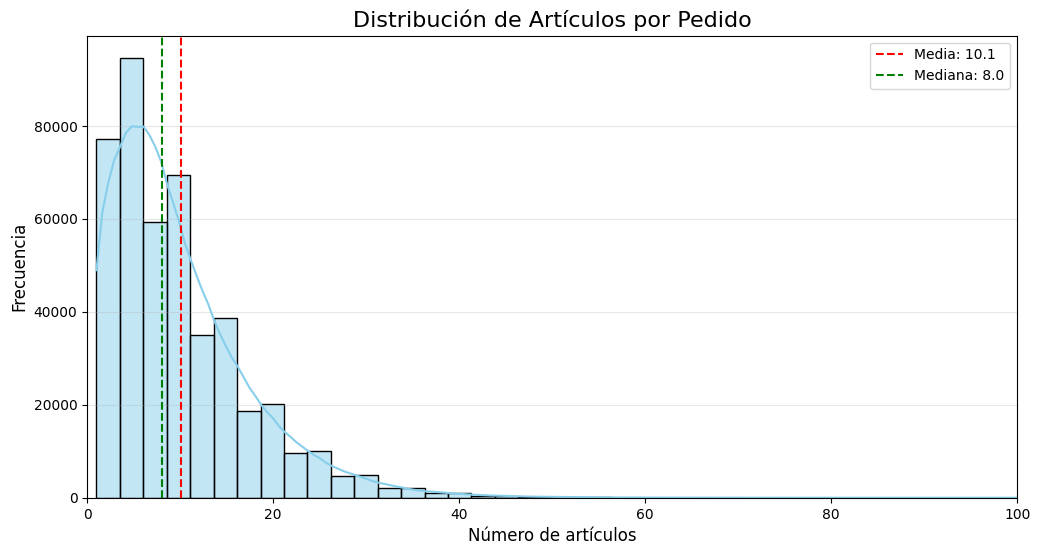

In [120]:
plt.figure(figsize=(12, 6))

sns.histplot(items_per_order, bins=50, kde=True, color='skyblue')

plt.axvline(items_per_order.mean(), color='red', linestyle='--', label=f'Media: {items_per_order.mean():.1f}')
plt.axvline(items_per_order.median(), color='green', linestyle='--', label=f'Mediana: {items_per_order.median():.1f}')


plt.title('Distribución de Artículos por Pedido', fontsize=16)
plt.xlabel('Número de artículos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlim(0, 100)  # Excluir outliers extremos para mejor visualización
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

Escribe aquí tus conclusiones en la ultima grafica podemos ver como se comportan los pedidos de los clientes y aunque la mayoria compra menos de diez articulos la media y la mediana estan cerca del diez 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy bien! La distribución muestra que los clientes compran pocas unidades por orden. Si ajustas el número de columnas (bins) en el histograma, verás que una orden típica tiene entre 5 y 6 artículos. Esto sugiere compras frecuentes y enfocadas en la frescura o conveniencia de cada cliente

</div>

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [121]:
reordered_products = (
    order_products[order_products['reordered'] == 1]  # Filtrar solo reórdenes
    .groupby('product_id')
    .size()
    .reset_index(name='total_reorders')
    .merge(products[['product_id', 'product_name']], on='product_id')
    .sort_values('total_reorders', ascending=False)
    .head(20)
)

print("Top 20 Productos Más Reordenados:")
print(reordered_products.to_string(index=False))

Top 20 Productos Más Reordenados:
 product_id  total_reorders             product_name
      24852           55763                   Banana
      13176           44450   Bag of Organic Bananas
      21137           28639     Organic Strawberries
      21903           26233     Organic Baby Spinach
      47209           23629     Organic Hass Avocado
      47766           18743          Organic Avocado
      27845           16251       Organic Whole Milk
      47626           15044              Large Lemon
      27966           14748      Organic Raspberries
      16797           13945             Strawberries
      26209           13327                    Limes
      22935           11145     Organic Yellow Onion
      24964           10411           Organic Garlic
      45007           10076         Organic Zucchini
      49683            9538           Cucumber Kirby
      28204            8989       Organic Fuji Apple
       8277            8836 Apple Honeycrisp Organic
      39275 

<BarContainer object of 20 artists>

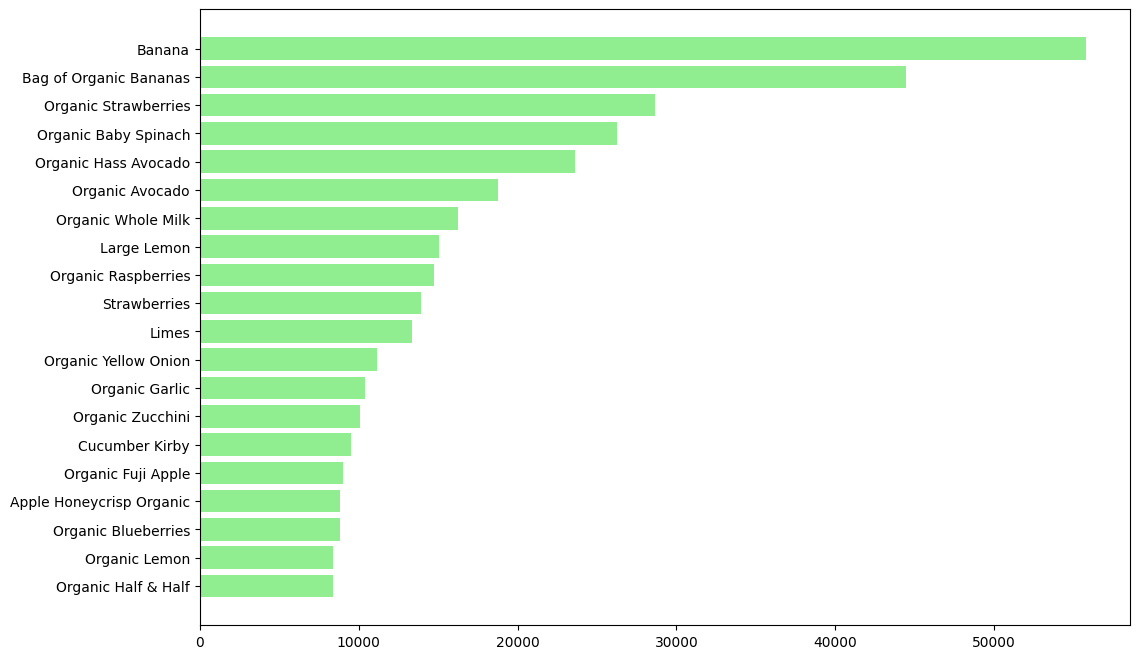

In [122]:
plt.figure(figsize=(12, 8))
plt.barh(
    reordered_products['product_name'][::-1],  # Invertir para mejor visualización
    reordered_products['total_reorders'][::-1],
    color='lightgreen'
)


In [123]:
reordered_with_categories = (
    reordered_products
    .merge(products[['product_id', 'aisle_id']])
    .merge(aisles, on='aisle_id')
)

print(" Categorías de productos más reordenados:")
print(reordered_with_categories[['product_name', 'aisle']].to_string(index=False))

 Categorías de productos más reordenados:
            product_name                      aisle
                  Banana               fresh fruits
  Bag of Organic Bananas               fresh fruits
    Organic Strawberries               fresh fruits
    Organic Hass Avocado               fresh fruits
         Organic Avocado               fresh fruits
             Large Lemon               fresh fruits
            Strawberries               fresh fruits
                   Limes               fresh fruits
      Organic Fuji Apple               fresh fruits
Apple Honeycrisp Organic               fresh fruits
           Organic Lemon               fresh fruits
    Organic Baby Spinach packaged vegetables fruits
     Organic Raspberries packaged vegetables fruits
     Organic Blueberries packaged vegetables fruits
      Organic Whole Milk                       milk
    Organic Yellow Onion           fresh vegetables
          Organic Garlic           fresh vegetables
        Organic Zucchi

Escribe aquí tus conclusiones aqui podemos ver la grafica de los articulos mas pedidos y la lista de ellos esto nos da un panorama de que negocio puede sabre salir o aumentar stock 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Gran trabajo! Identificaste muy bien el Top 20 de productos más reordenados, y coincide con la lista anterior. Se destacan productos agrícolas y lácteos, lo cual es lógico por su consumo frecuente. Esto muestra un patrón de compra muy coherente con las necesidades diarias.

</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

Columnas en order_products: ['order_id', 'product_id', 'add_to_cart_order', 'reordered']
Columnas en products: ['product_id', 'product_name', 'aisle_id', 'department_id', 'nombre_normalizado']
 Análisis completado exitosamente


,product_id,total_pedidos,reorders,reorder_ratio,product_name
4,24852,"66,050","55,763",84.43%,Banana
0,13176,"53,297","44,450",83.40%,Bag of Organic Bananas
2,21137,"37,039","28,639",77.32%,Organic Strawberries
3,21903,"33,971","26,233",77.22%,Organic Baby Spinach
7,47209,"29,773","23,629",79.36%,Organic Hass Avocado
9,47766,"24,689","18,743",75.92%,Organic Avocado
8,47626,"21,495","15,044",69.99%,Large Lemon
1,16797,"20,018","13,945",69.66%,Strawberries
5,26209,"19,690","13,327",67.68%,Limes
6,27845,"19,600","16,251",82.91%,Organic Whole Milk


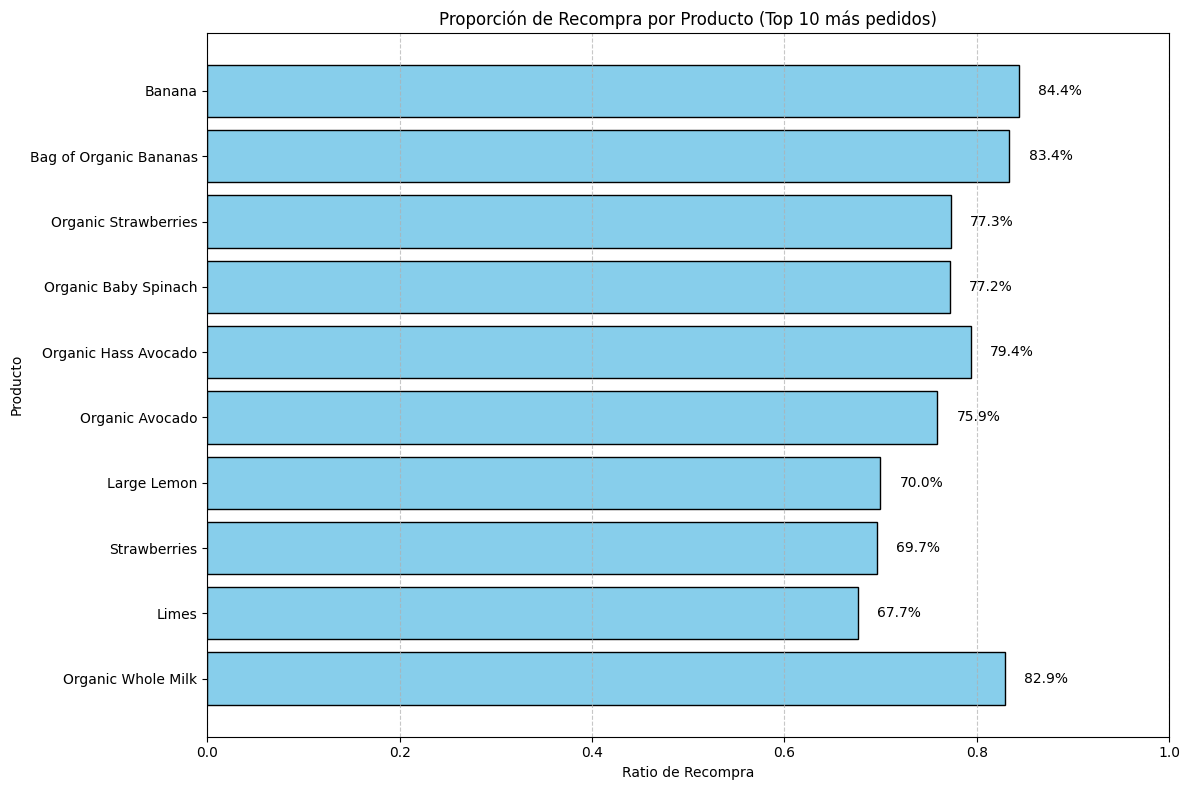

In [124]:
print("Columnas en order_products:", order_products.columns.tolist())
print("Columnas en products:", products.columns.tolist())

top_products = (
    order_products
    .groupby('product_id') 
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='total_pedidos')
    .merge(products[['product_id', 'product_name']], on='product_id')
)

try:
    reorder_stats = (
        order_products[order_products['product_id'].isin(top_products['product_id'])]
        .groupby('product_id')
        .agg(
            total_pedidos=('product_id', 'count'),
            reorders=('reordered', 'sum')
        )
        .assign(
            reorder_ratio=lambda x: x['reorders'] / x['total_pedidos']
        )
        .merge(products[['product_id', 'product_name']], on='product_id')
        .sort_values('total_pedidos', ascending=False)
    )
    
    print(" Análisis completado exitosamente")
    display(reorder_stats.style.format({
        'total_pedidos': '{:,}',
        'reorders': '{:,}',
        'reorder_ratio': '{:.2%}'
    }))

except KeyError as e:
    print(f" Error: No se encontró la columna {e}. Verifica los nombres de columnas.")
    print("Columnas disponibles en order_products:", order_products.columns.tolist())
plt.figure(figsize=(12, 8))

reorder_stats_sorted = reorder_stats.sort_values('total_pedidos', ascending=True)

plt.barh(
    reorder_stats_sorted['product_name'],
    reorder_stats_sorted['reorder_ratio'],
    color='skyblue',
    edgecolor='black'
)

plt.title('Proporción de Recompra por Producto (Top 10 más pedidos)')
plt.xlabel('Ratio de Recompra')
plt.ylabel('Producto')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(reorder_stats_sorted['reorder_ratio']):
    plt.text(v + 0.02, i, f"{v:.1%}", color='black', va='center')

plt.tight_layout()
plt.show()  

Escribe aquí tus conclusiones Aqui imprimi los diez productos mas pedidos y su relacion entre product_name vs reoder_ratio y nos podemos dar una idea clara de que los pedidos mas recurrentes son perecederos y en la mayoria de los casos las personas prefieren de origen origanico es decir sin conservadores y por consecuente menos tiempo de vida.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [125]:
client_order_details = pd.merge(
    orders[['order_id', 'user_id']],
    order_products[['order_id', 'product_id', 'reordered']],
    on='order_id'
)

client_order_details = client_order_details.merge(
    products[['product_id', 'product_name']],
    on='product_id',
    how='left'
)
client_reorder_analysis = (
    client_order_details
    .groupby('user_id')
    .agg(
        total_products=('product_id', 'count'),
        reordered_products=('reordered', 'sum')
    )
    .assign(
        reorder_ratio=lambda x: x['reordered_products'] / x['total_products']
    )
    .sort_values('reorder_ratio', ascending=False)
)

significant_clients = client_reorder_analysis[client_reorder_analysis['total_products'] >= 5]

print("Muestra de clientes y sus ratios de recompra:")
display(significant_clients.head(10))

Muestra de clientes y sus ratios de recompra:


,total_products,reordered_products,reorder_ratio
user_id,,,
62300,7,7,1.0
135349,22,22,1.0
42811,6,6,1.0
62327,16,16,1.0
32633,5,5,1.0
62213,10,10,1.0
74382,5,5,1.0
135493,18,18,1.0
135486,10,10,1.0


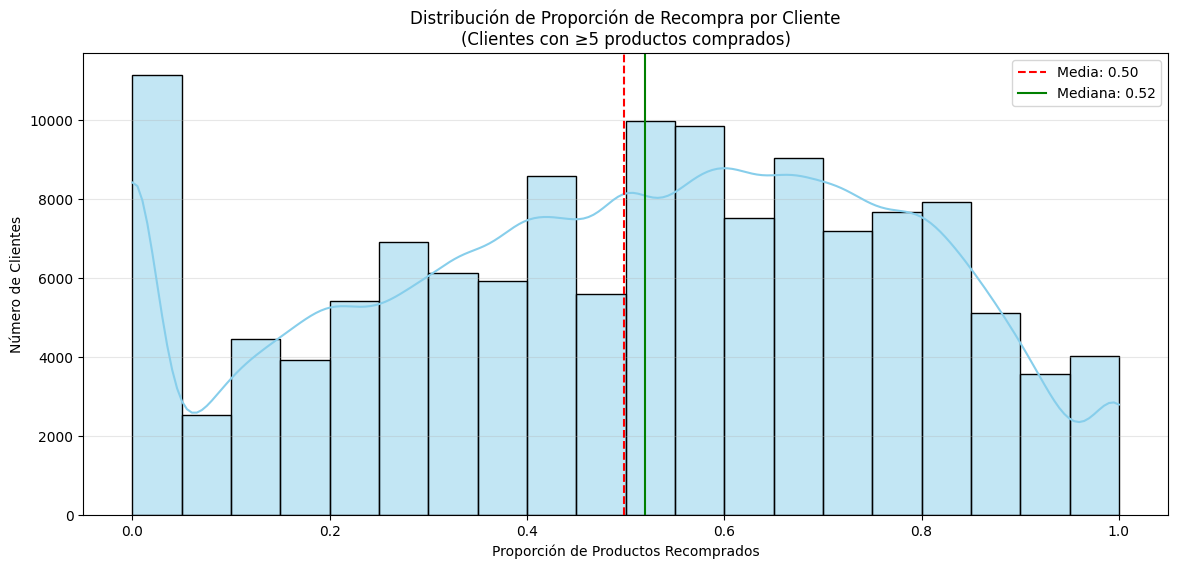

In [126]:
plt.figure(figsize=(14, 6))

sns.histplot(
    data=significant_clients,
    x='reorder_ratio',
    bins=20,
    kde=True,
    color='skyblue'
)

plt.title('Distribución de Proporción de Recompra por Cliente\n(Clientes con ≥5 productos comprados)')
plt.xlabel('Proporción de Productos Recomprados')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', alpha=0.3)


mean_ratio = significant_clients['reorder_ratio'].mean()
median_ratio = significant_clients['reorder_ratio'].median()
plt.axvline(mean_ratio, color='red', linestyle='--', label=f'Media: {mean_ratio:.2f}')
plt.axvline(median_ratio, color='green', linestyle='-', label=f'Mediana: {median_ratio:.2f}')

plt.legend()
plt.show()


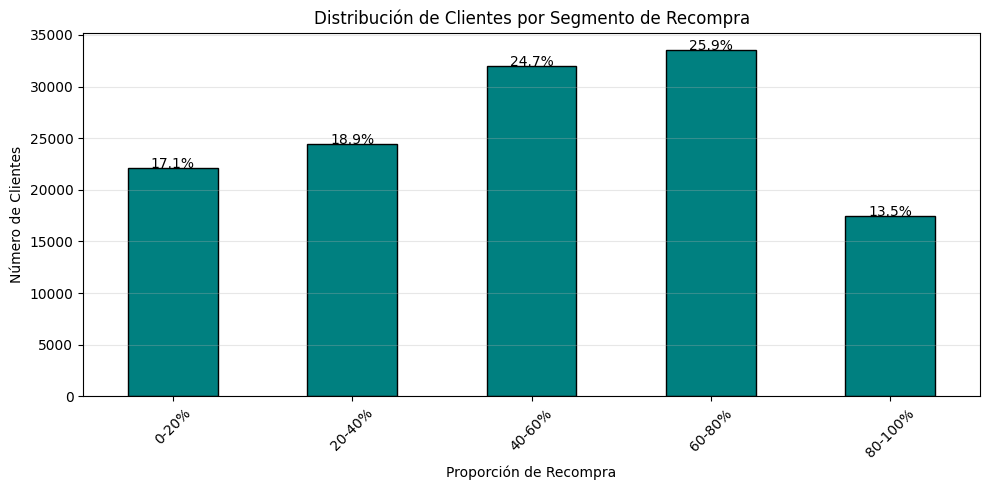

In [127]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

segment_counts = pd.cut(
    significant_clients['reorder_ratio'],
    bins=bins,
    labels=labels,
    right=False
).value_counts().sort_index()

plt.figure(figsize=(10, 5))
segment_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Distribución de Clientes por Segmento de Recompra')
plt.xlabel('Proporción de Recompra')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

total = segment_counts.sum()
for i, v in enumerate(segment_counts):
    plt.text(i, v + 5, f"{v/total:.1%}", ha='center')

plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones En esta ultima grafica podemos ver que mas del 39% de los clientes tiene un ratio de recompra arriba del 60% esto quiere decir que son clientes habituales, entonces podemos buscar los productos que compran los que tienen menor indice de recompra para lanzar promociones o incentivos para generar la recompra mas frecuente.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [128]:
first_in_cart = order_products[order_products['add_to_cart_order'] == 1]


In [129]:
top_first_in_cart = (
    first_in_cart['product_id']
    .value_counts()
    .head(20)
    .reset_index()
    .rename(columns={'index': 'product_id', 'product_id': 'count'})
)


In [130]:
top_first_in_cart_with_names = top_first_in_cart.merge(
    products[['product_id', 'product_name']], 
    on='product_id'
)


In [131]:
print("Top 20 productos añadidos primero al carrito:")
display(top_first_in_cart_with_names)

Top 20 productos añadidos primero al carrito:


,product_id,count,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


Escribe aquí tus conclusiones En esta tabla podemos observar como los primeros articulos tienden a ser productos organicos es decir que tiene un tiempo de consumo  mas corto y algunos pocos productos que son mas altamente consumibles cono la SODA

### Conclusion general del proyecto:

In [70]:
#El manejo y limpieza de los datos es primordial para el analisis de los mismo y la creacion de DataFrames nos ayuda a dividirlos con cierto orden que nos ayude a entender como fueron agrupados para obtener informacion estadistica con eso datos 
#algo que es vital para el analisis es entender la impotacia y manejo de los datos faltantes o duplicados ya que, como vimos el que no tengan valores NaN nos indica algo cuando vemos el panorama de la informacion.
# y adicional la representacion grafica de los datos ayuda a una mejor interpretacion de la informacion.